In [1]:
import pandas as pd
df = pd.read_csv('events.csv')
print(df.head())

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 07:02:12.117,2015,6,2,1,7
1,1433224214164,992329,view,248676,NaN,2015-06-02 07:50:14.164,2015,6,2,1,7
2,1433221999827,111016,view,318965,NaN,2015-06-02 07:13:19.827,2015,6,2,1,7
3,1433221955914,483717,view,253185,NaN,2015-06-02 07:12:35.914,2015,6,2,1,7
4,1433221337106,951259,view,367447,NaN,2015-06-02 07:02:17.106,2015,6,2,1,7


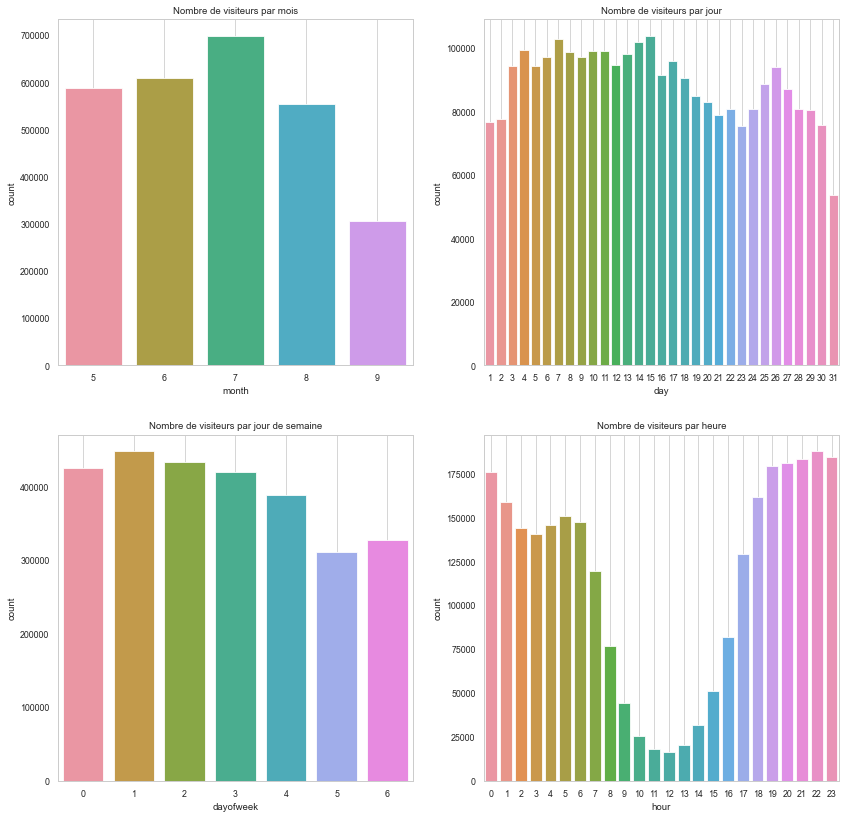

In [9]:
# DATAVIZ 1
## SOOYOUNG 09/01 ##
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Visiteurs par date
plt.figure(figsize = (14,14))

# Visiteurs par mois
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.title('Nombre de visiteurs par mois')
plt.grid()

# Visiteurs par jour
plt.subplot(222)
sns.countplot(x='day', data=df)
plt.title('Nombre de visiteurs par jour')
plt.grid()

# Visiteurs par jour de semaine
plt.subplot(223)
sns.countplot(x='dayofweek', data=df)
plt.title('Nombre de visiteurs par jour de semaine')
plt.grid()

# Visiteurs par heure
plt.subplot(224)
sns.countplot(x='hour', data=df)
plt.title('Nombre de visiteurs par heure')
plt.grid()

In [3]:
## SOOYOUNG 09/01 ##
# Nombre de visites
stats = df.groupby('visitorid').agg({'visitorid':'count'})
stats = stats.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par visitorid
view = df.loc[df['event'] == 'view'].groupby('visitorid').agg({'visitorid':'count'})
view = view.rename(columns={"visitorid": "nb_views"})

# Nombre de addtocarts par visitorid
addtocart = df.loc[df['event'] == 'addtocart'].groupby('visitorid').agg({'visitorid':'count'})
addtocart = addtocart.rename(columns={"visitorid": "nb_addtocarts"})

# Nombre de transactions par visitorid
transaction = df.loc[df['event'] == 'transaction'].groupby('visitorid').agg({'visitorid':'count'})
transaction = transaction.rename(columns={"visitorid": "nb_transactions"})

# Merge les dataframes
stats = pd.merge(stats, view, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, addtocart, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, transaction, left_index=True, right_index=True, how='left')
    
stats.sort_values('nb_transactions', ascending=False)


,nb_visites,nb_views,nb_addtocarts,nb_transactions
visitorid,,,,
1150086,7757,6479.0,719.0,559.0
152963,3024,2304.0,371.0,349.0
530559,4328,3623.0,419.0,286.0
684514,2246,1826.0,231.0,189.0
861299,1991,1573.0,230.0,188.0
...,...,...,...,...
1407575,1,1.0,NaN,NaN
1407576,1,1.0,NaN,NaN
1407577,1,1.0,NaN,NaN


In [58]:
## MELISSA 09/01 ##
import statsmodels.api

print("On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.") 

print("Relation entre la variable continue transactionid et la variable catégorielle event.")
print("Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).")

result = statsmodels.formula.api.ols('transactionid ~ event', data = df).fit()
table_eventXtransactionid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid ")

print("On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.")
print("On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),") 
print("si il y a des relations entre ces nouvelles variables quantitatives")

table_eventXtransactionid

On s'intéresse à la relation entre la variable catégorielle 'event' et la variable transactionid, pour savoir si le comportement du consomateur à un impact sur les transactions.
Relation entre la variable continue transactionid et la variable catégorielle event.
Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA).
df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid 
On voit qu'il n'y a pas de relation entre la variable 'event' et la variable 'transactionid'.
On va donc découper la variable catégorielle event pour voir si à l'intérieur de chaque comportement (nb_view, nb_addtocart, nb_transaction),
si il y a des relations entre ces nouvelles variables quantitatives


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,3.484181e+07,1.742090e+07,0.669981,0.511729
Residual,22455.0,5.838769e+11,2.600209e+07,NaN,NaN


In [43]:
result = statsmodels.formula.api.ols('itemid ~ event', data = df).fit()
table_eventXitemid = statsmodels.api.stats.anova_lm(result)

print("df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.")
print("Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.")

table_eventXitemid

df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.


,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,4.217666e+11,2.108833e+11,11.710356,0.000008
Residual,2756098.0,4.963256e+16,1.800827e+10,NaN,NaN


<AxesSubplot:>

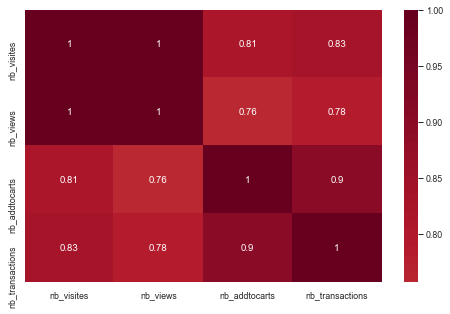

In [46]:
# DATAVIZ 2
## SOOYOUNG 06/02 ##
plt.figure(figsize=(8,5))
sns.heatmap(stats.corr(), annot=True, cmap='RdBu_r', center=0)



Relation entre les variables nombre de addtocarts et nombre de transactions


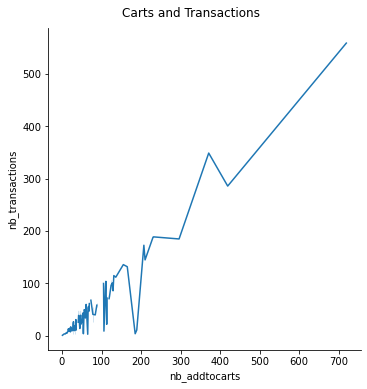

In [4]:
# DATAVIZ 3
## SOOYOUNG 09/01 ##
print("Relation entre les variables nombre de addtocarts et nombre de transactions")
g = sns.relplot(x="nb_addtocarts", 
                y="nb_transactions",
                data=stats,
                kind="line",
                markers=True,
                dashes=False)
g.fig.suptitle("Carts and Transactions",y=1.03)
plt.show()



In [5]:
# DATAVIZ 3 - Stats
# Calculate Pearson's correlation
from scipy.stats import pearsonr
stats = stats.fillna(0)
pd.DataFrame(pearsonr(stats['nb_addtocarts'], stats['nb_transactions']), index=['pearson_coeff', 'p-value'], columns=['Relation entre nb_addtocarts et nb_transactions'])

,Relation entre nb_addtocarts et nb_transactions
pearson_coeff,0.903854
p-value,0.000000


In [7]:
# DATAVIZ 3 - Stats
pd.DataFrame(pearsonr(stats['nb_views'], stats['nb_transactions']), index=['pearson_coef','p-value'], columns = ['Relation entre nb_views et nb_transactions'])


,Relation entre nb_views et nb_transactions
pearson_coef,0.782903
p-value,0.000000


In [ ]:
## OCEANE ##
# Nombre de views par visitorid, par item 
visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_view = visit_view.rename(columns={"event": "nb_view"})
visit_view.sort_values('nb_view', ascending=False)

# Nombre de paniers par visitorid, par item 
visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_add = visit_add.rename(columns={"event": "nb_addtocart"})
visit_add.sort_values('nb_addtocart', ascending=False)

# Nombre de transacs par visitorid, par item 
visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})
visit_transac = visit_transac.rename(columns={"event": "nb_transac"})
visit_transac.sort_values('nb_transac', ascending=False)

visit_item=pd.merge(visit_view, visit_add, how='outer')
visit_item=pd.merge(visit_item, visit_transac, how='outer')
visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])
visit_item.sort_values(by='nb_transac', ascending=False)

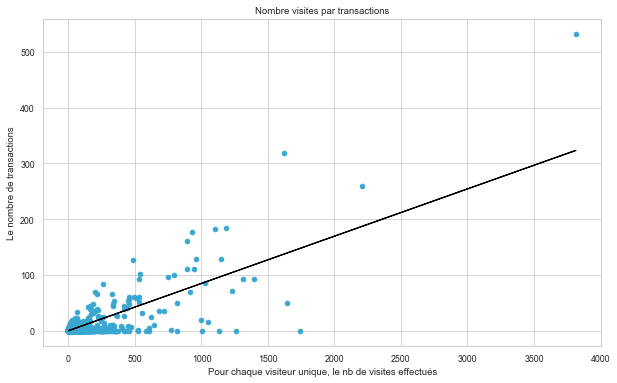

In [53]:
# DATAVIZ 4
## OCEANE ##
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

nb_transactions=visitor_transaction['nb_transac']
view_by_visitor=visitor_transaction[['nb_de_visit']]

slr=LinearRegression()
slr.fit(view_by_visitor, nb_transactions)
cross_validate(slr, view_by_visitor, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_transac = slr.predict(view_by_visitor)
residus = pred_transac - nb_transactions

# On va faire un groupement des visitors qui achètent le plus 
visitor_transaction=visit_item.groupby(by='visitorid').agg({'nb_transac':'count', 'visitorid':'count'}).rename(columns={'visitorid':'nb_de_visit'})

plt.figure(figsize=(10,6))
plt.scatter(x='nb_de_visit', y='nb_transac', data=visitor_transaction)
plt.xlabel('Pour chaque visiteur unique, le nb de visites effectués')
plt.ylabel('Le nombre de transactions')
plt.title('Nombre visites par transactions');
plt.plot(view_by_visitor, pred_transac, color="black");




In [55]:
# DATAVIZ 4 - Stats
# Test de Pearson ? 
print("la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.")
print("Lorsque le nombre de view augmentent les transactions augmentent aussi.")

pd.DataFrame(pearsonr(visitor_transaction['nb_de_visit'],visitor_transaction['nb_transac']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])



la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.
Lorsque le nombre de view augmentent les transactions augmentent aussi.


,resultat_test
pearson_coeff,0.777609
p-value,0.000000


In [10]:
## SOOYOUNG 09/01 ##
# Nombre de visites par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')
items

# Remplaçons les Nans par 0 
items = items.fillna(0)
# Vérifions que les Nans ont bien été remplacé
items.isnull().sum(axis = 0)



,nb_visites,nb_views,nb_addtocarts,nb_transactions
itemid,,,,
3,2,2.0,NaN,NaN
4,3,3.0,NaN,NaN
6,29,29.0,NaN,NaN
9,2,2.0,NaN,NaN
15,22,18.0,3.0,1.0
...,...,...,...,...
466861,95,89.0,5.0,1.0
466862,4,4.0,NaN,NaN
466863,1,1.0,NaN,NaN


In [12]:
## SOOYOUNG 30/01 ##
n_produits = 20

# les 20 produits plus achetés
top_produits_vendus = items.sort_values(by='nb_transactions', ascending=False).head(n_produits)
top_produits_vendus['cat_produits_plus_vendus'] = "1"
top_produits_vendus = top_produits_vendus.drop(columns=['nb_visites', 'nb_views', 'nb_addtocarts'])

# les 20 produits plus mis au panier
top_produits_paniers = items.sort_values(by='nb_addtocarts', ascending=False).head(n_produits)
top_produits_paniers['cat_produits_plus_mis_panier'] = "1"
top_produits_paniers = top_produits_paniers.drop(columns=['nb_visites', 'nb_views', 'nb_transactions'])

# les 20 produits plus vus
top_produits_vus = items.sort_values(by='nb_views', ascending=False).head(n_produits)
top_produits_vus['cat_produits_plus_vus'] = "1"
top_produits_vus = top_produits_vus.drop(columns=['nb_visites', 'nb_addtocarts', 'nb_transactions'])

# Merge les 3 dataframes OUTER
top_produits = pd.merge(top_produits_vendus, top_produits_paniers, left_index=True, right_index=True, how='outer')
top_produits = pd.merge(top_produits, top_produits_vus, left_index=True, right_index=True, how='outer')

top_produits = top_produits[['nb_views', 'nb_addtocarts', 'nb_transactions', 'cat_produits_plus_vus', 'cat_produits_plus_mis_panier', 'cat_produits_plus_vendus']]
top_produits.head()

,nb_views,nb_addtocarts,nb_transactions,cat_produits_plus_vus,cat_produits_plus_mis_panier,cat_produits_plus_vendus
itemid,,,,,,
5411,2325.0,NaN,NaN,1,NaN,NaN
7943,1346.0,97.0,46.0,1,1,1
9877,NaN,70.0,NaN,NaN,1,NaN
17478,NaN,72.0,37.0,NaN,1,1
29196,NaN,136.0,NaN,NaN,1,NaN


/Users/sooyounglee/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


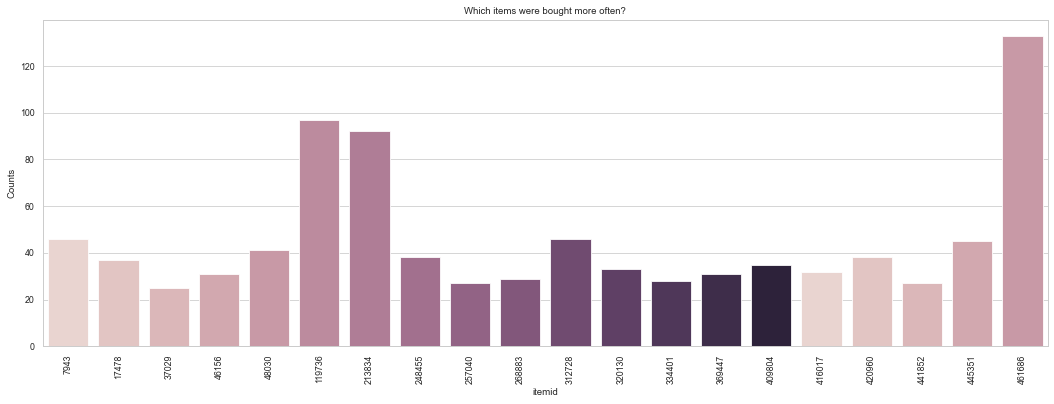

In [18]:
# DATAVIZ 6
## MELISSA ##
plt.figure(figsize=(18,6))
sns.barplot(top_produits_vendus.index, top_produits_vendus.nb_transactions, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août
l'item 119736 est plus populaire au mois de juin et août
l'item 213834 est plus populaire au mois de juillet
l'item 312728 est plus populaire durant l'été


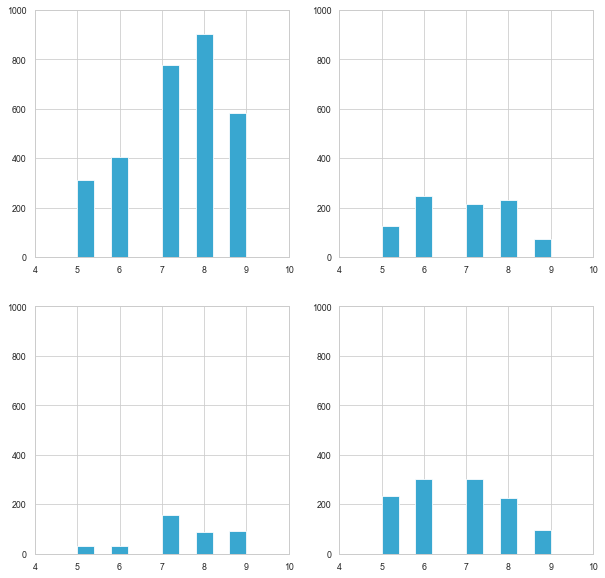

In [28]:
# DATAVIZ 7
## SADALI ##
# Etudier l'évolution des 4 items les plus achetés par rapport au mois  
l = {461686,119736}
max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.axis([4,10,0,1000])
plt.hist(max_item_1.month);

plt.subplot(222)
plt.axis([4,10,0,1000])
plt.hist(max_item_2.month);

plt.subplot(223)
plt.axis([4,10,0,1000])
plt.hist(max_item_3.month);

plt.subplot(224)
plt.axis([4,10,0,1000])
plt.hist(max_item_4.month);

print("Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août")
print("l'item 119736 est plus populaire au mois de juin et août")
print("l'item 213834 est plus populaire au mois de juillet")
print("l'item 312728 est plus populaire durant l'été")

In [38]:
## SADALI ##
items = items.fillna(0)
print("p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes")
print("coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.")
pd.DataFrame(pearsonr(items['nb_views'], items['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test_items'])



p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.


,resultat_test_items
pearson_coef,0.540263
p-value,0.000000


In [13]:
## SOOYOUNG 30/01 ##
# Si un produit est dans les 3 catégories plus vus, plus mis, plus vendus, 
# le produit sera classé 3 étoiles dans cat_produits_recommandations
top_produits = top_produits.fillna(0)
top_produits['stars_produits_recommandations'] = top_produits['cat_produits_plus_vus'].astype(int) + top_produits['cat_produits_plus_mis_panier'].astype(int) + top_produits['cat_produits_plus_vendus'].astype(int)

top_produits = top_produits.sort_values(by='stars_produits_recommandations', ascending=False)
top_produits


,nb_views,nb_addtocarts,nb_transactions,cat_produits_plus_vus,cat_produits_plus_mis_panier,cat_produits_plus_vendus,stars_produits_recommandations
itemid,,,,,,,
461686,2539.0,306.0,133.0,1,1,1,3
37029,1131.0,71.0,25.0,1,1,1,3
234255,1214.0,77.0,16.0,1,1,1,3
257040,1531.0,89.0,27.0,1,1,1,3
312728,947.0,162.0,46.0,1,1,1,3
...,...,...,...,...,...,...,...
301721,0.0,0.0,18.0,0,0,1,1
112782,1094.0,0.0,0.0,1,0,0,1
111530,1397.0,0.0,0.0,1,0,0,1
